# Explaining airline passenger satisfaction
* Description: The report details the exploratory analysis supervised machine learning modeling, and model explainability conducted on a dataset detailing customer satisfaction for an airline.
* This project was assembled in a Python 3.10.12 environment using Jupyter Notebooks. The Pandas, Numpy, Seaborn, and Matplotlib libraries were utilized for exploratory analysis. XGBoost and Scikit-Learn were used to create the modelling pipelines and obtain metrics.

* Steps:
  1. Extract, Load and transform data
  2. EDA analysis of the data
  3. Analysis of the most appropriate number of clusters
  4. Training and Testing of the trained K-Means model

* AC:  Github repository to access the project and analyze the process

## Import packeges and tools 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt # Visualization data
import seaborn as sns # Visualization data
import nltk
import numpy as np
%matplotlib inline

# 1. Dataset

The datasets are in .csv format. The dataset also comes with the target column ‘satisfaction’ pre-defined.

The data used for this project comprised 71,892 initial rows in total with 24 initial columns.

In [9]:
df_air = pd.read_csv("data/Encuesta.csv")
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71892 entries, 0 to 71891
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         71892 non-null  int64  
 1   Gender                             71892 non-null  object 
 2   customer_type                      71892 non-null  object 
 3   age                                71892 non-null  int64  
 4   type_of_travel                     71892 non-null  object 
 5   customer_class                     71892 non-null  object 
 6   flight_distance                    71892 non-null  int64  
 7   inflight_wifi_service              71892 non-null  int64  
 8   departure_arrival_time_convenient  71892 non-null  int64  
 9   ease_of_online_booking             71892 non-null  int64  
 10  gate_location                      71892 non-null  int64  
 11  food_and_drink                     71892 non-null  int

In [10]:
df_air.describe()

Unnamed: 0           age  flight_distance  inflight_wifi_service  \
count   71892.000000  71892.000000     71892.000000           71892.000000   
mean    91056.520642     39.411423      1179.221888               2.707408   
std     24840.235631     15.216180       991.742638               1.313077   
min     39463.000000      7.000000        31.000000               0.000000   
25%     75484.500000     27.000000       409.000000               2.000000   
50%     93465.500000     40.000000       836.000000               3.000000   
75%    111765.250000     51.000000      1724.000000               4.000000   
max    129879.000000     85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                       71892.000000            71892.000000   
mean                            3.059784                2.748192   
std                             1.524496                1.394226   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       gate_location  food_and_drink  online_boarding  seat_comfort  \
count   71892.000000    71892.000000     71892.000000  71892.000000   
mean        2.982835        3.192803         3.224782      3.418600   
std         1.273073        1.330704         1.347681      1.321368   
min         0.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      4.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       inflight_entertainment  onboard_service  leg_room_service  \
count            71892.000000     71892.000000      71892.000000   
mean                 3.332680         3.365145          3.334057   
std                  1.338945         1.288575          1.318916   
min                  0.000000         0.000000          0.000000   
25%                  2.000000         2.000000          2.000000   
50%                  4.000000         4.000000          4.000000   
75%                  4.000000         4.000000          4.000000   
max                  5.000000         5.000000          5.000000   

       baggage_handling  checkin_service  inflight_service   cleanliness  \
count      71892.000000     71892.000000      71892.000000  71892.000000   
mean           3.619207         3.293218          3.630821      3.267401   
std            1.180144         1.268619          1.177874      1.316923   
min            1.000000         1.000000          0.000000      0.000000   
25%            3.000000         2.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       departure_delay_in_minutes  arrival_delay_in_minutes  
count                71892.000000              71676.000000  
mean                    14.719246                 15.161072  
std                     38.158946                 38.501499  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

### Observation on the dataset
* In the datasets: 
  * 18 rows were of an int datatype, 
  * 1 was of a float datatype, 
  * and 5 were of a categorical datatype (object).

* The ‘unnamed’ columns can be dropped as they are of no use to us 

* Datatype mismatch in the two delay columns: arrival column is of a float datatype while the departure column is a whole integer datatype 

* There are null values present in the arrival_delay_in_minutes column as well — with 216 missing

* A simple value count reveals the presence of zero values, which by their number can be interpreted as default values for null answers.

* We can create two new columns: binary column indicating whether or not the flight experienced a delay (departure or arrival) and a column of the total amount of time that the flight spent in delay 

In [5]:
df_air.head()

Unnamed: 0  Gender      customer_type  age   type_of_travel customer_class  \
0       39463  Female  disloyal Customer   46  Business travel            Eco   
1       39464    Male     Loyal Customer   24  Business travel            Eco   
2       39467    Male     Loyal Customer   63  Business travel       Business   
3       39470    Male     Loyal Customer   38  Business travel       Business   
4       39471  Female     Loyal Customer   35  Personal Travel            Eco   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0              406                      3                                  0   
1              479                      4                                  3   
2             2009                      2                                  3   
3             1984                      1                                  4   
4             2288                      1                                  3   

   ease_of_online_booking  ...  inflight_entertainment  onboard_service  \
0                       4  ...                       5                1   
1                       3  ...                       4                2   
2                       3  ...                       2                2   
3                       5  ...                       1                1   
4                       2  ...                       3                2   

   leg_room_service  baggage_handling  checkin_service  inflight_service  \
0                 5                 4                2                 4   
1                 2                 1                4                 1   
2                 2                 2                3                 2   
3                 2                 1                1                 1   
4                 1                 4                2                 4   

   cleanliness  departure_delay_in_minutes  arrival_delay_in_minutes  \
0            5                           0                      17.0   
1            4                           0                       0.0   
2            2                           0                      30.0   
3            4                           2                       0.0   
4            3                           0                       0.0   

                satisfaction  
0   neutral or dissatisfied   
1   neutral or dissatisfied   
2   neutral or dissatisfied   
3   neutral or dissatisfied   
4   neutral or dissatisfied   

[5 rows x 24 columns]

### Operations on the dataset
1. Dropping of unnecessary column or columns
2. Uniformize datatypes in delay column
3. Normalizing column names.
4. Normalizing text values in columns.
5. Imputing numeric null values with the mean value of the column.
6. Dropping "zero" values from ranked categorical variables.
7. Creating aggregated flight delay column

In [17]:
def clean_data(orig_df):
    '''
    This function applies 5 steps to the dataframe to clean the data.
    1. Dropping of unnecessary column or columns
    2. Uniformize datatypes in delay column
    3. Normalizing column names.
    4. Normalizing text values in columns.
    5. Imputing numeric null values with the mean value of the column.
    6. Dropping "zero" values from ranked categorical variables.
    7. Creating aggregated flight delay column
    
    Return: Cleaned DataFrame, ready for analysis - final encoding still to be applied.
    '''

    df = orig_df.copy()

    # Dropping off unnecessary columns
    df.drop(['Unnamed: 0'], axis=1, inplace=True)

    # Uniformizing datatype in delay column
    df['departure_delay_in_minutes'] = df['departure_delay_in_minutes'].astype(
        float)
    
    # Normalizing column names
    df.columns = df.columns.str.lower()
    
    # Replacing spaces and other characters with underscores, this is more 
    # for us to make it easier to work with them and so that we can call them using dot notation.
    special_chars = "/ -"
    for special_char in special_chars:
        df.columns = [col.replace(special_char, '_') for col in df.columns]
    
    # Normalizing text values in columns
    cat_cols = ['gender', 'customer_type',
                'customer_class', 'type_of_travel', 'satisfaction']

    for column in cat_cols:
        df[column] = df[column].str.lower()
    
    # Imputing the nulls in the arrival delay column with the mean.
    # Since we cannot safely equate these nulls to a zero value, the mean value of the column is the
    # most sensible method of replacement.

    df['arrival_delay_in_minutes'].fillna(
        df['arrival_delay_in_minutes'].mean(), inplace=True)
    df.round({'arrival_delay_in_minutes': 1})
    
    # Dropping rows from ranked value columns where "zero" exists as a value
    # Since these columns are meant to be ranked on a scale from 1 to 5, having zero as a value 
    # does not make sense nor does it help us in any way.

    rank_list = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location",
                 "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "onboard_service",
                 "leg_room_service", "baggage_handling", "checkin_service", "inflight_service", "cleanliness"]
    
    # Creating aggregated and categorical flight delay columns
    df['total_delay_time'] = (
        df['departure_delay_in_minutes'] + df['arrival_delay_in_minutes'])
    df['was_flight_delayed'] = np.nan
    df['was_flight_delayed'] = np.where(
        df['total_delay_time'] > 0, 'yes', 'no')

    for col in rank_list:
        df.drop(df.loc[df[col] == 0].index, inplace=True)

    cleaned_df = df

    return cleaned_df

### Applying the transformations to the dataset original

In [19]:
df_cleaned = clean_data(df_air)

/tmp/ipykernel_7262/2849166954.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arrival_delay_in_minutes'].fillna(


In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66233 entries, 1 to 71891
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             66233 non-null  object 
 1   customer_type                      66233 non-null  object 
 2   age                                66233 non-null  int64  
 3   type_of_travel                     66233 non-null  object 
 4   customer_class                     66233 non-null  object 
 5   flight_distance                    66233 non-null  int64  
 6   inflight_wifi_service              66233 non-null  int64  
 7   departure_arrival_time_convenient  66233 non-null  int64  
 8   ease_of_online_booking             66233 non-null  int64  
 9   gate_location                      66233 non-null  int64  
 10  food_and_drink                     66233 non-null  int64  
 11  online_boarding                    66233 non-null  int64  


In [22]:
df_cleaned.head()

gender   customer_type  age   type_of_travel customer_class  \
1    male  loyal customer   24  business travel            eco   
2    male  loyal customer   63  business travel       business   
3    male  loyal customer   38  business travel       business   
4  female  loyal customer   35  personal travel            eco   
5    male  loyal customer   47  personal travel            eco   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
1              479                      4                                  3   
2             2009                      2                                  3   
3             1984                      1                                  4   
4             2288                      1                                  3   
5              526                      2                                  5   

   ease_of_online_booking  gate_location  ...  leg_room_service  \
1                       3              3  ...                 2   
2                       3              3  ...                 2   
3                       5              4  ...                 2   
4                       2              3  ...                 1   
5                       2              3  ...                 3   

   baggage_handling  checkin_service  inflight_service  cleanliness  \
1                 1                4                 1            4   
2                 2                3                 2            2   
3                 1                1                 1            4   
4                 4                2                 4            3   
5                 5                5                 4            3   

   departure_delay_in_minutes  arrival_delay_in_minutes  \
1                         0.0                       0.0   
2                         0.0                      30.0   
3                         2.0                       0.0   
4                         0.0                       0.0   
5                         0.0                       0.0   

                satisfaction  total_delay_time  was_flight_delayed  
1   neutral or dissatisfied                0.0                  no  
2   neutral or dissatisfied               30.0                 yes  
3   neutral or dissatisfied                2.0                 yes  
4   neutral or dissatisfied                0.0                  no  
5   neutral or dissatisfied                0.0                  no  

[5 rows x 25 columns]

# 3. Exploratory Analysis
### Proportion of customers are satisfied or dissatisfiedproportion
This will inform whether or not additional steps will be needed before moving on (resampling, downsampling, etc.). 

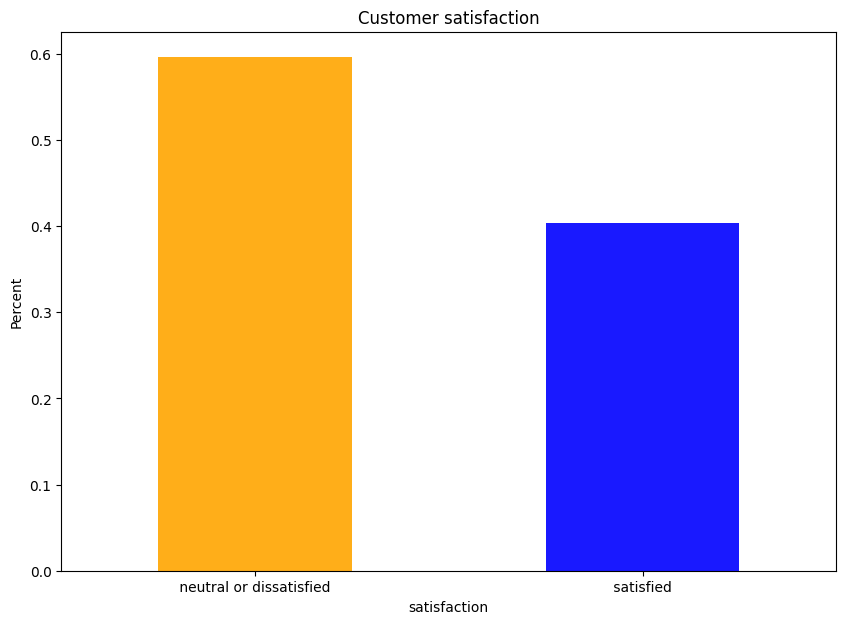

In [25]:
fig = plt.figure(figsize=(10, 7))
df_cleaned.satisfaction.value_counts(
    normalize=True).plot(kind='bar', alpha=0.9, rot=0, color={"orange", "blue"})
plt.title('Customer satisfaction')
plt.ylabel('Percent')
plt.show()

The proportions — roughly 58% neutral or dissatisfied to 42% satisfied don’t show an imbalance capable of providing misleading predictions later on during model training and prediction.
### Currently think of the customers about their travel service

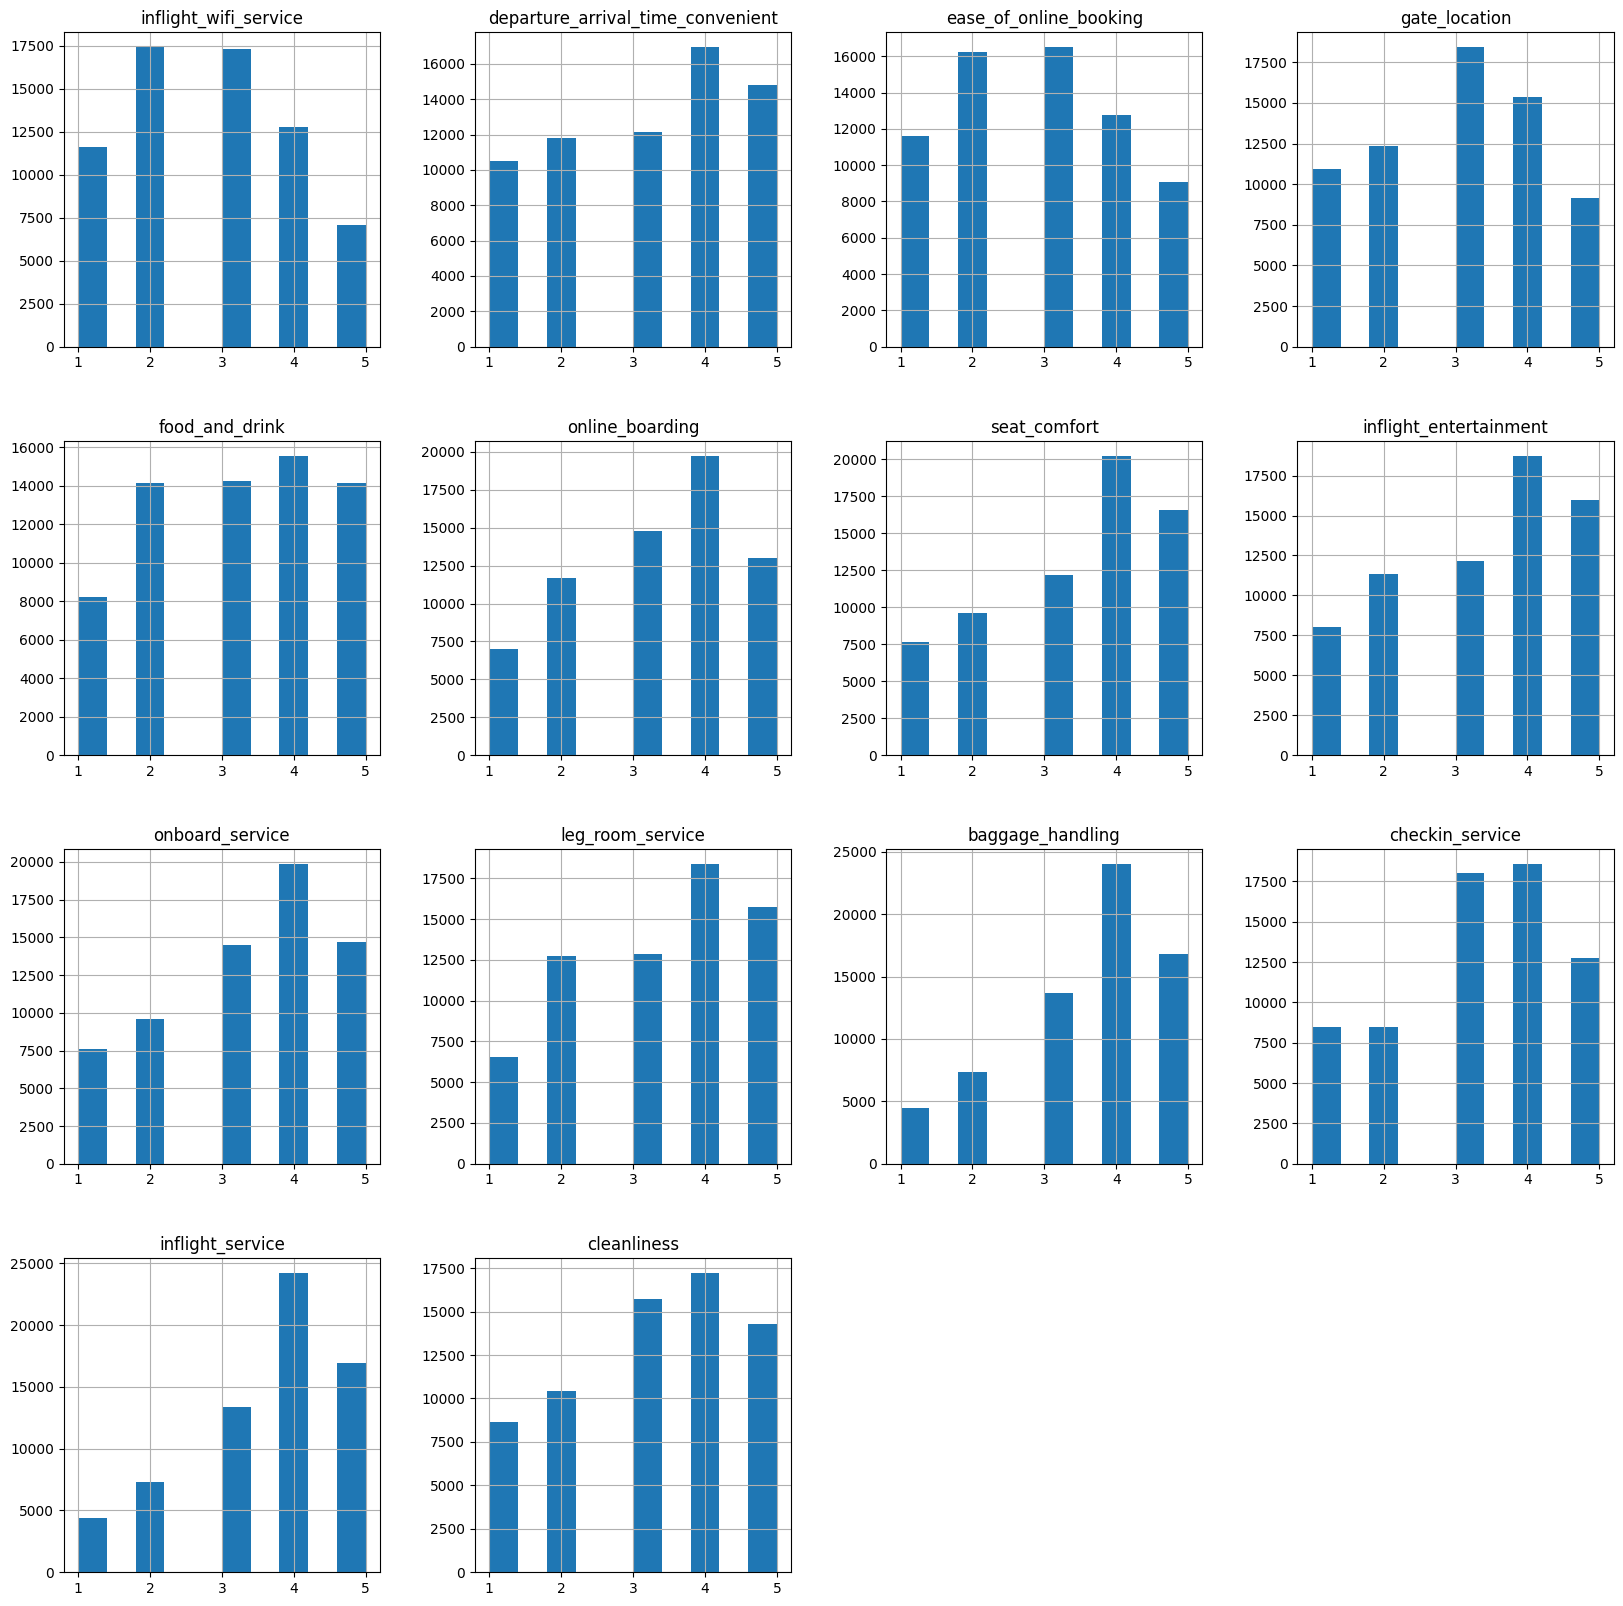

In [28]:
cols_categ = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking",
                "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment",
                "onboard_service", "leg_room_service", "baggage_handling", "checkin_service",
                "inflight_service", "cleanliness"]

df_cleaned.hist(column = cols_categ, layout=(4, 4), label='x', figsize = (20, 20));

### Specific groups respond in terms of satisfaction (Gender and customer status)

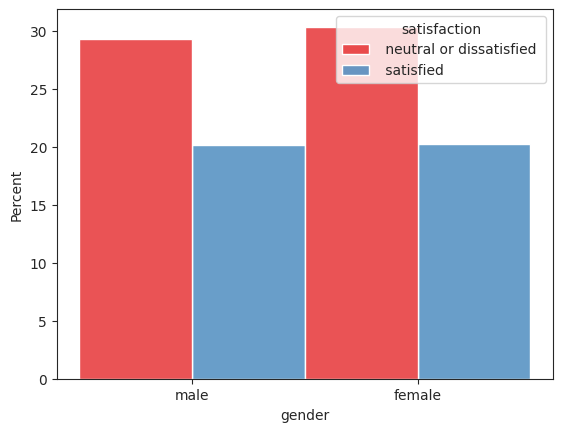

In [29]:
with sns.axes_style(style='ticks'):
    d = sns.histplot(x="gender",  hue='satisfaction', data=df_cleaned,
                     stat='percent', multiple="dodge", palette='Set1')

 It doesn’t appear that any one group is more prone to being generally satisfied with their travel experience than the other

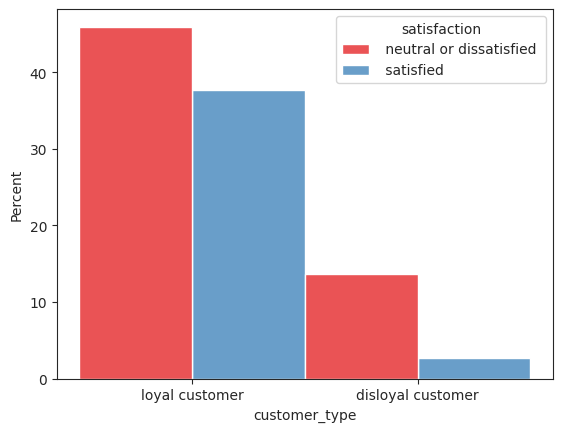

In [39]:
with sns.axes_style(style='ticks'):
    d = sns.histplot(x="customer_type",  hue='satisfaction', data=df_cleaned,
                     stat='percent', multiple="dodge", palette='Set1')

Don’t see any group being treated better than the other considering loyalty customers far outweigh non-loyalty customers in the dataset, the dissatisfied group outweighs the satisfied group in both variables.

### Analysis of passengers in different class travel experience 

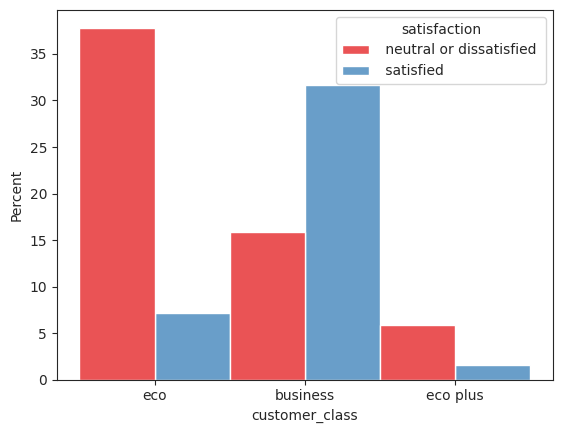

In [38]:
with sns.axes_style(style='ticks'):
    d = sns.histplot(x="customer_class",  hue='satisfaction', data=df_cleaned,
                     stat='percent', multiple="dodge", palette='Set1')

Observe that the satisfaction of passengers traveling in business class versus those traveling in economy class show a higher satisfaction value, this can be a very important point to consider to determine the bias of the model.

### Passengers who travel for business or personal leisure

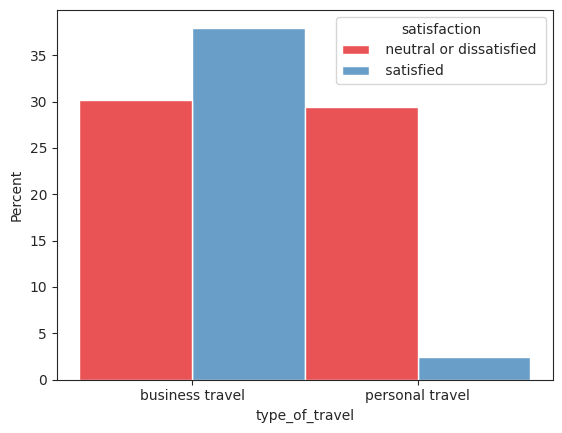

In [37]:
with sns.axes_style(style='ticks'):
    d = sns.histplot(x="type_of_travel",  hue='satisfaction', data=df_cleaned,
                     stat='percent', multiple="dodge", palette='Set1')

Passengers travelling for business seem far more likely to be satisfied with the experience of their trip than those who travel for personal reasons

### Analysis of satisfaction with their travel experience by age

/tmp/ipykernel_7262/1660699326.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


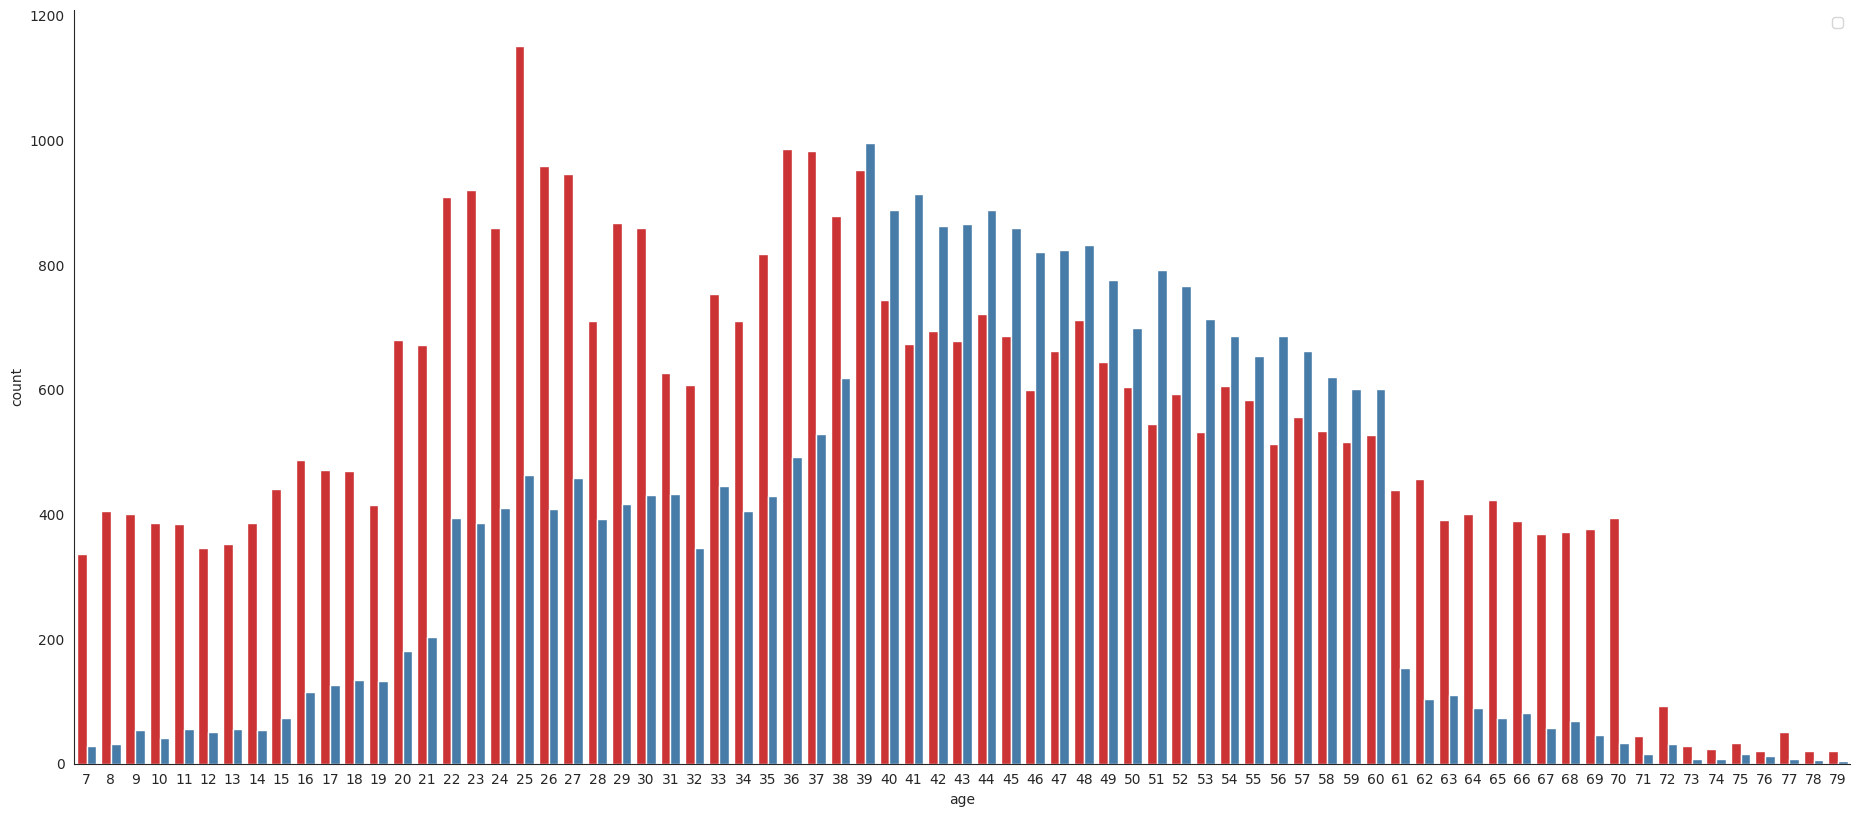

In [41]:
# Countplot comparing age to satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x='age', data=df_cleaned,
                    kind='count', hue='satisfaction', order=range(7, 80),
                    height=8.27, aspect=18.7/8.27, legend=False,
                    palette='Set1')

plt.legend(loc='upper right')

There is a group of customers ranging from age 38 to 61 who are generally satisfied with their trip experience

### Analysis of satisfaction across different ages in cabin flown

<Axes: xlabel='customer_class', ylabel='age'>

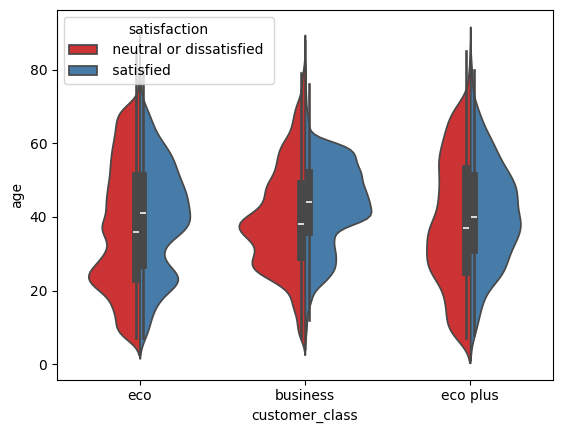

In [44]:
sns.violinplot(data=df_cleaned, x="customer_class", y="age",
               hue='satisfaction', palette='Set1', split=True)

### Analysis of how the distance traveled impacts customer satisfaction

/tmp/ipykernel_7262/1714700358.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x="satisfaction",


<Axes: xlabel='satisfaction', ylabel='flight_distance'>

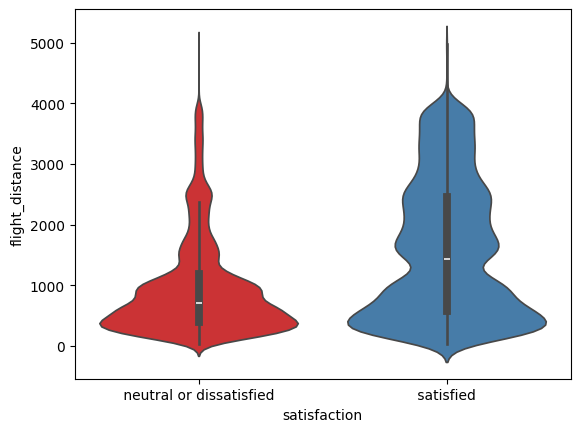

In [45]:
sns.violinplot(data=df_cleaned, x="satisfaction",
               y="flight_distance", palette='Set1')

### 

<Axes: xlabel='customer_class', ylabel='flight_distance'>

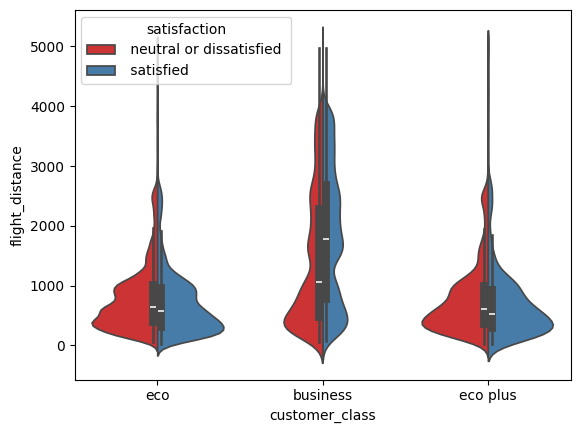

In [47]:
sns.violinplot(data=df_cleaned, x="customer_class", y="flight_distance",
               hue='satisfaction', palette='Set1', split=True)

### On-time performance analysis impacts customer satisfaction

/tmp/ipykernel_7262/3594108964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x="satisfaction",
/tmp/ipykernel_7262/3594108964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x="satisfaction",


<Axes: xlabel='satisfaction', ylabel='arrival_delay_in_minutes'>

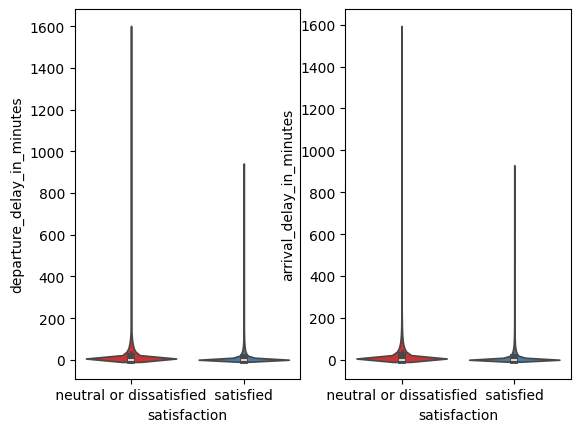

In [48]:
fig, axes = plt.subplots(1, 2)

sns.violinplot(data=df_cleaned, x="satisfaction",
               y="departure_delay_in_minutes", ax=axes[0], palette='Set1')
sns.violinplot(data=df_cleaned, x="satisfaction",
               y="arrival_delay_in_minutes", ax=axes[1], palette='Set1')

/tmp/ipykernel_7262/2433125788.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x="satisfaction",


<Axes: xlabel='satisfaction', ylabel='total_delay_time'>

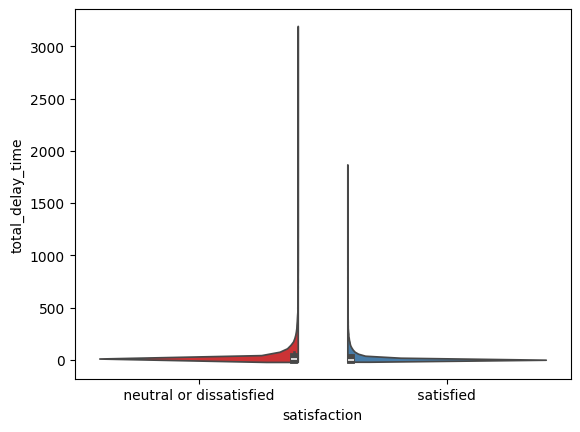

In [51]:
sns.violinplot(data=df_cleaned, x="satisfaction",
               y="total_delay_time", palette='Set1', split=True)

 With a majority of flights not having significant delays, I don't believe this particularly is a factor determining passenger satisfaction.

 ## Multivariate Analysis

In [53]:
score_cols = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking",
              "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment",
              "onboard_service", "leg_room_service", "baggage_handling", "checkin_service", "inflight_service",
              "cleanliness"]

/tmp/ipykernel_7262/412200220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned,
/tmp/ipykernel_7262/412200220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned,
/tmp/ipykernel_7262/412200220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned,
/tmp/ipykernel_7262/412200220.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(d

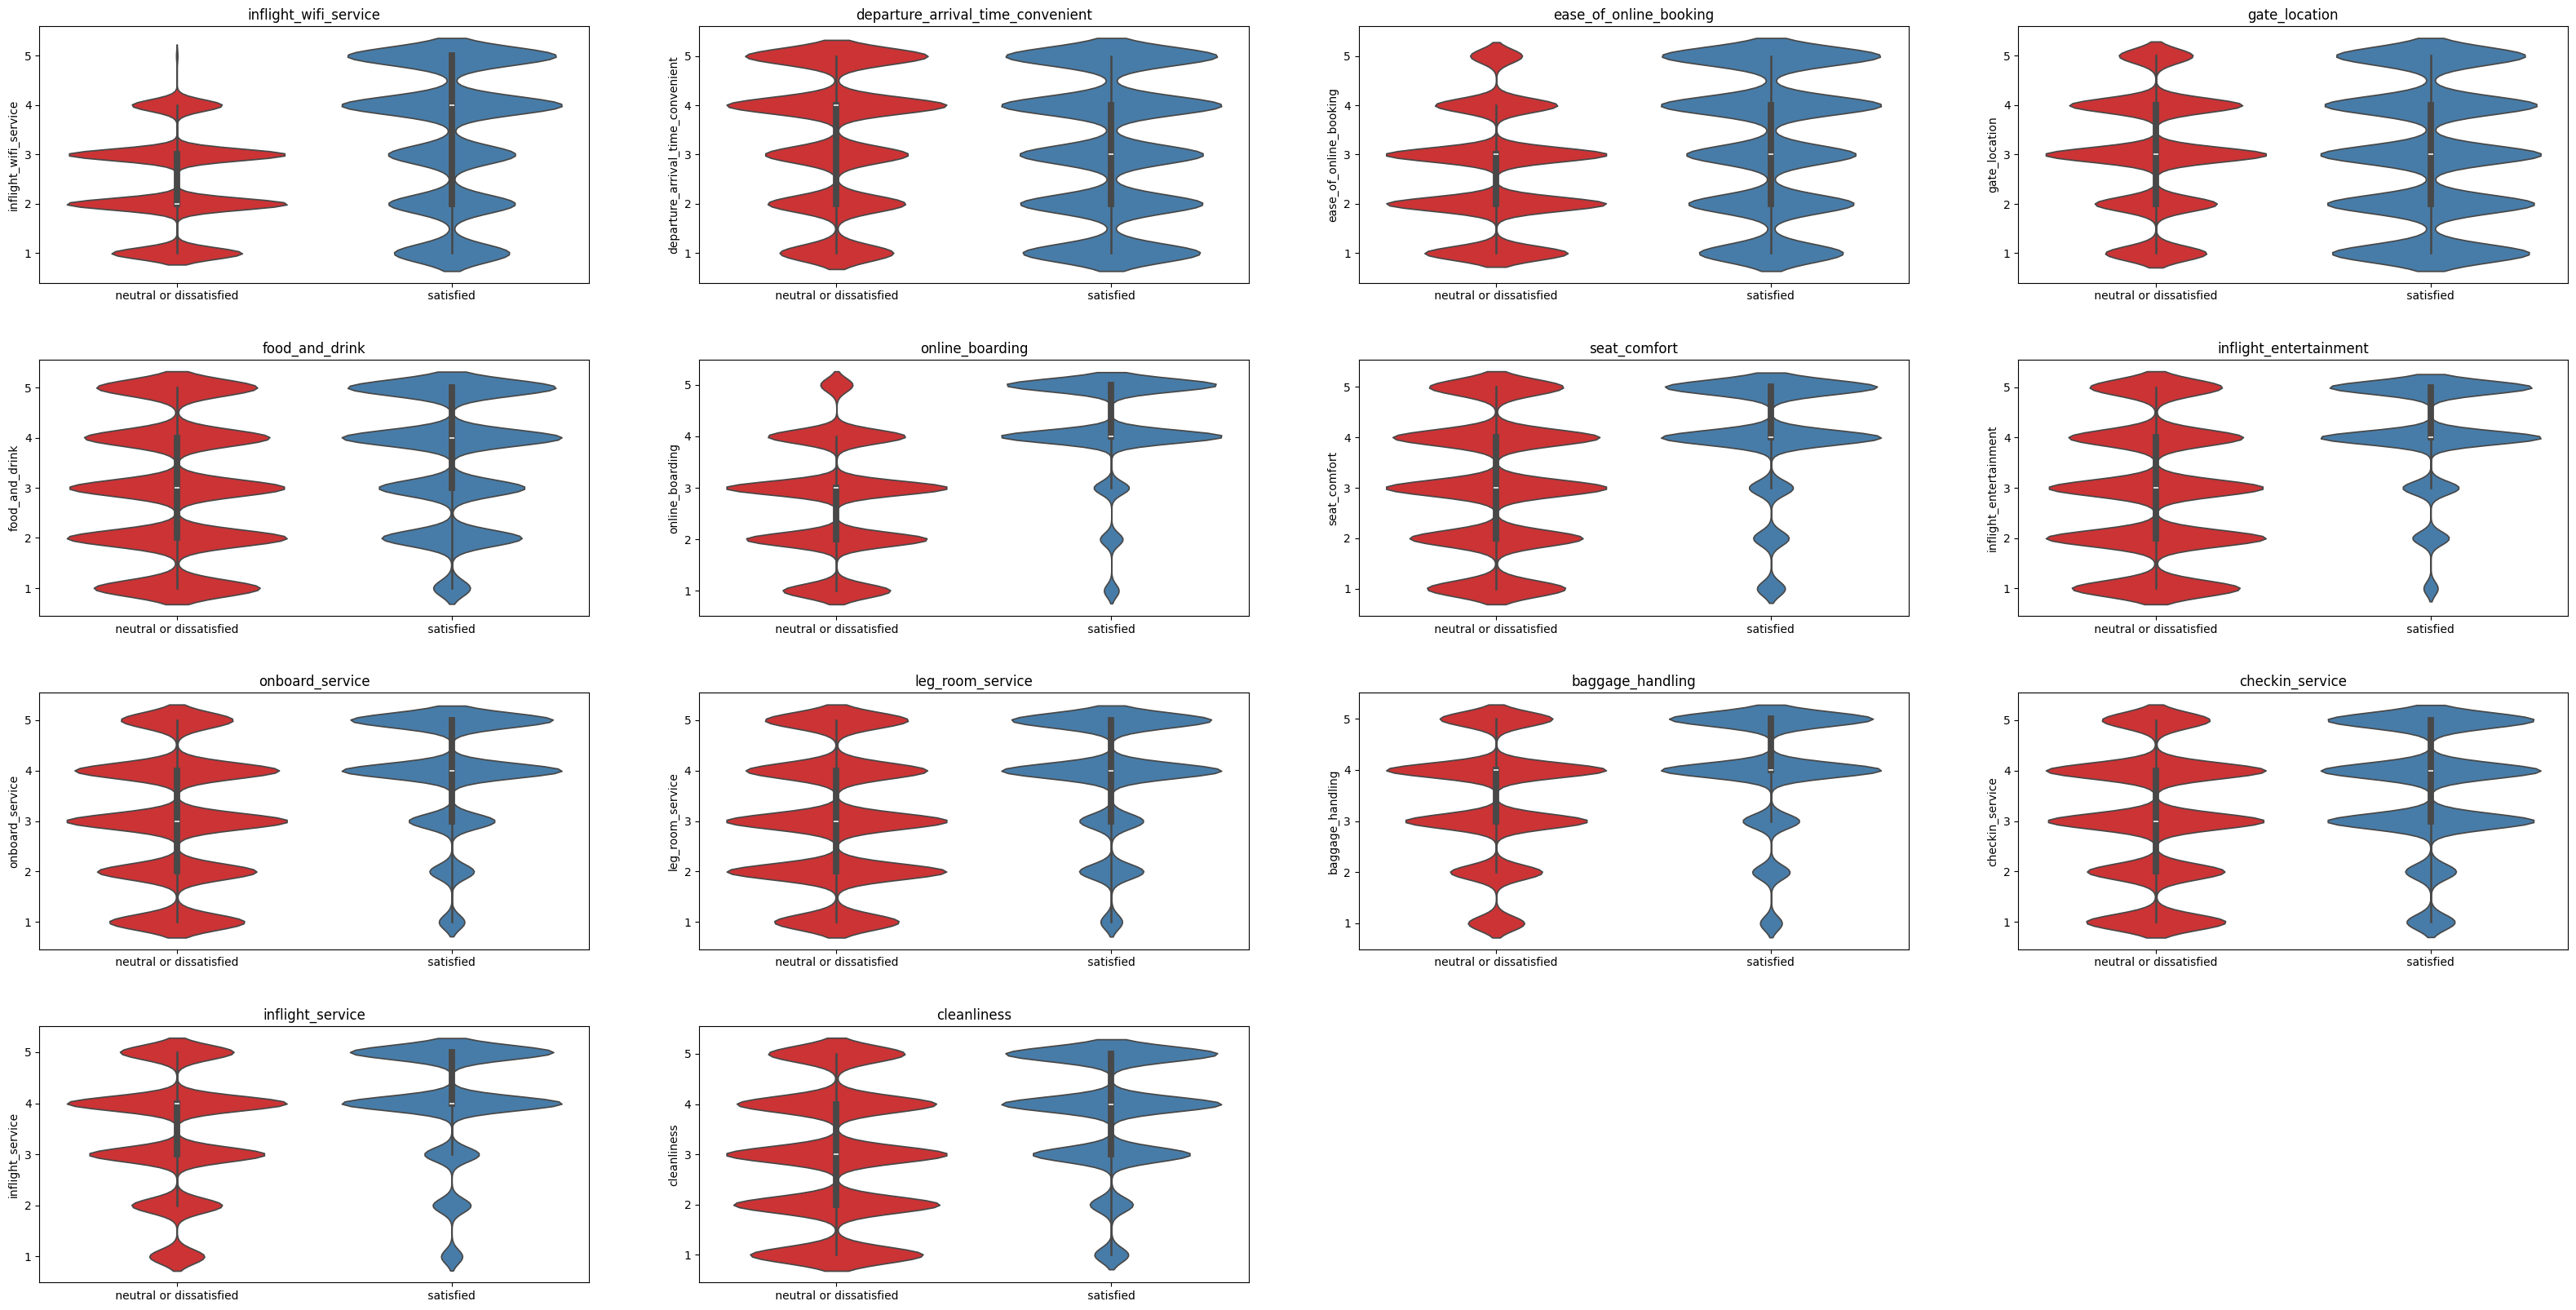

In [54]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data=df_cleaned,
                   x='satisfaction',
                   y=score_col,
                   ax=ax,
                   palette='Set1')

    # chart formatting
    ax.set_title(score_col),
    ax.set_xlabel("")

* Lower scores rating in-flight wi-fi and online booking have a higher impact on passenger dissatisfaction. 
* Passenger dissatisfaction has more influence from middle-high scores rating gate location, baggage handling, check-in, and in-flight customer service
* High marks in nearly all categories illustrate a clear impact on customer satisfaction.

### Age affect rated aspects of airline service

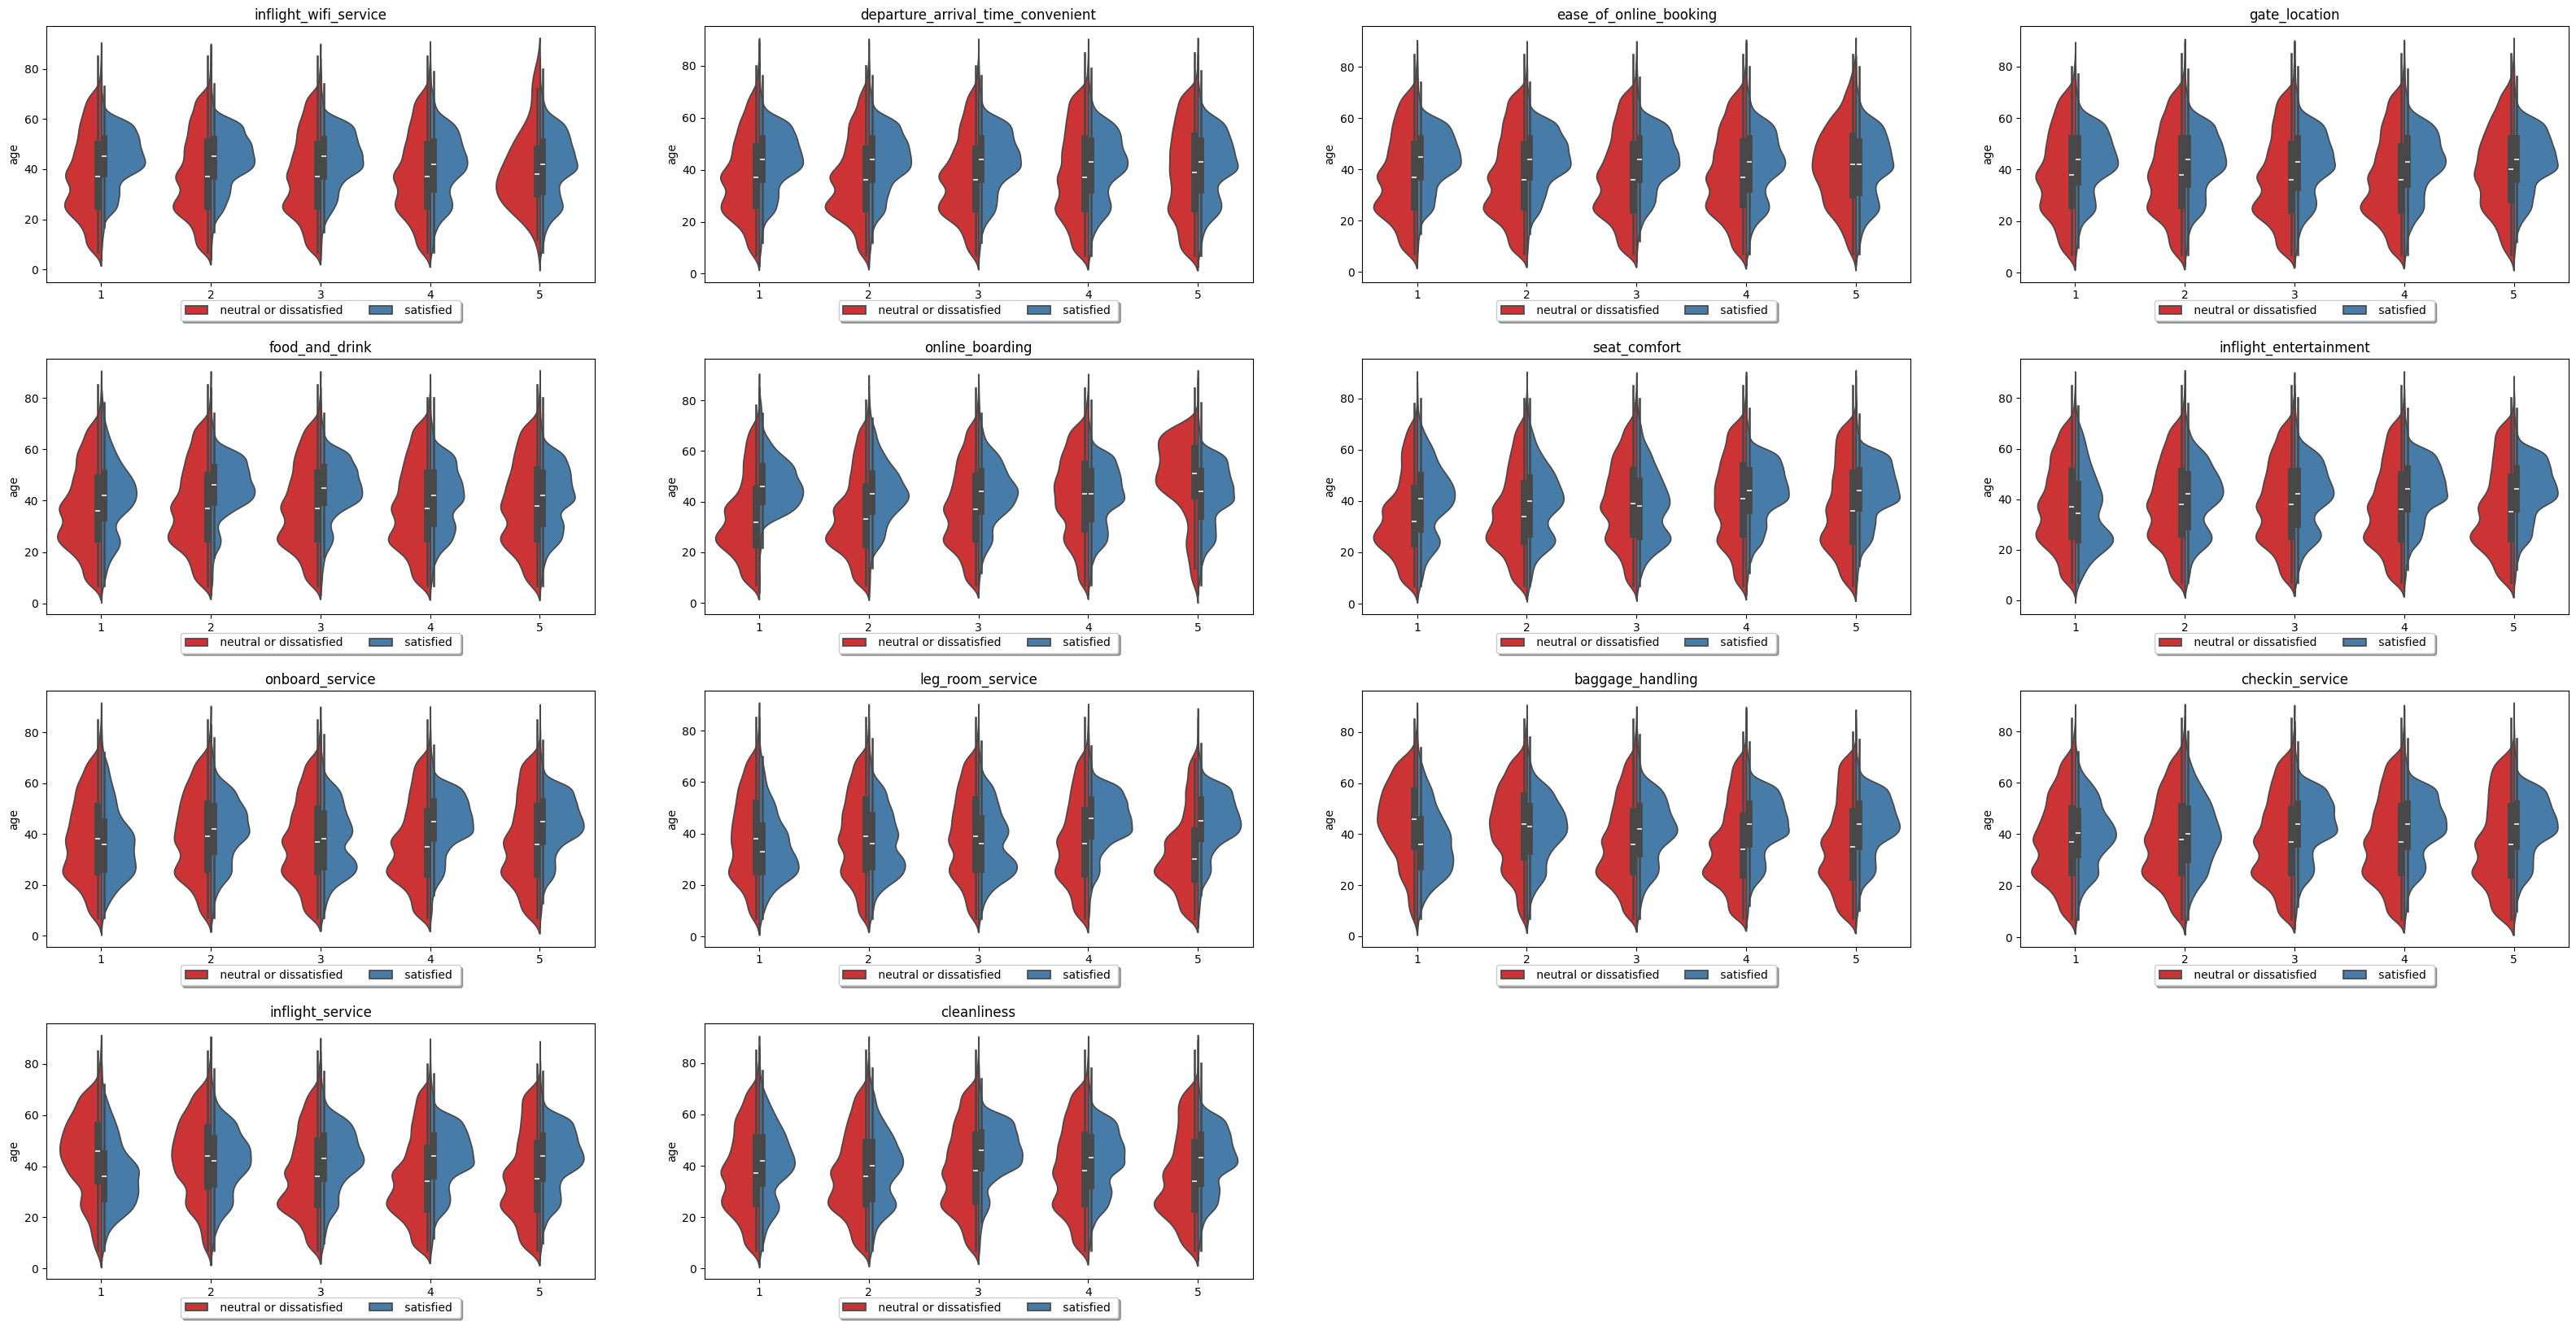

In [55]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data=df_cleaned,
                   x=score_col,
                   y='age',
                   hue="satisfaction",
                   split=True,
                   ax=ax,
                   palette='Set1')

    # Chart formatting
    ax.set_title(score_col),
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

* There is a noticeable peak in the 37-60 age group across most of these distributions.
* Customer service variables (in-flight customer service, baggage handling, leg room, on-board service quality, and inflight entertainment) have passengers measured as satisfied despite scoring the service column poorly.
* Leg room category, there are a large amount of younger travelers dissatisfied despite scoring the column highly
* In the online boarding category - where the 40-60 age group is measured as satisfied despite giving the service column the lowest possible score, and dissatisfied despite giving the service column the highest possible score.
  
### Light distance affect rated aspects of airline service

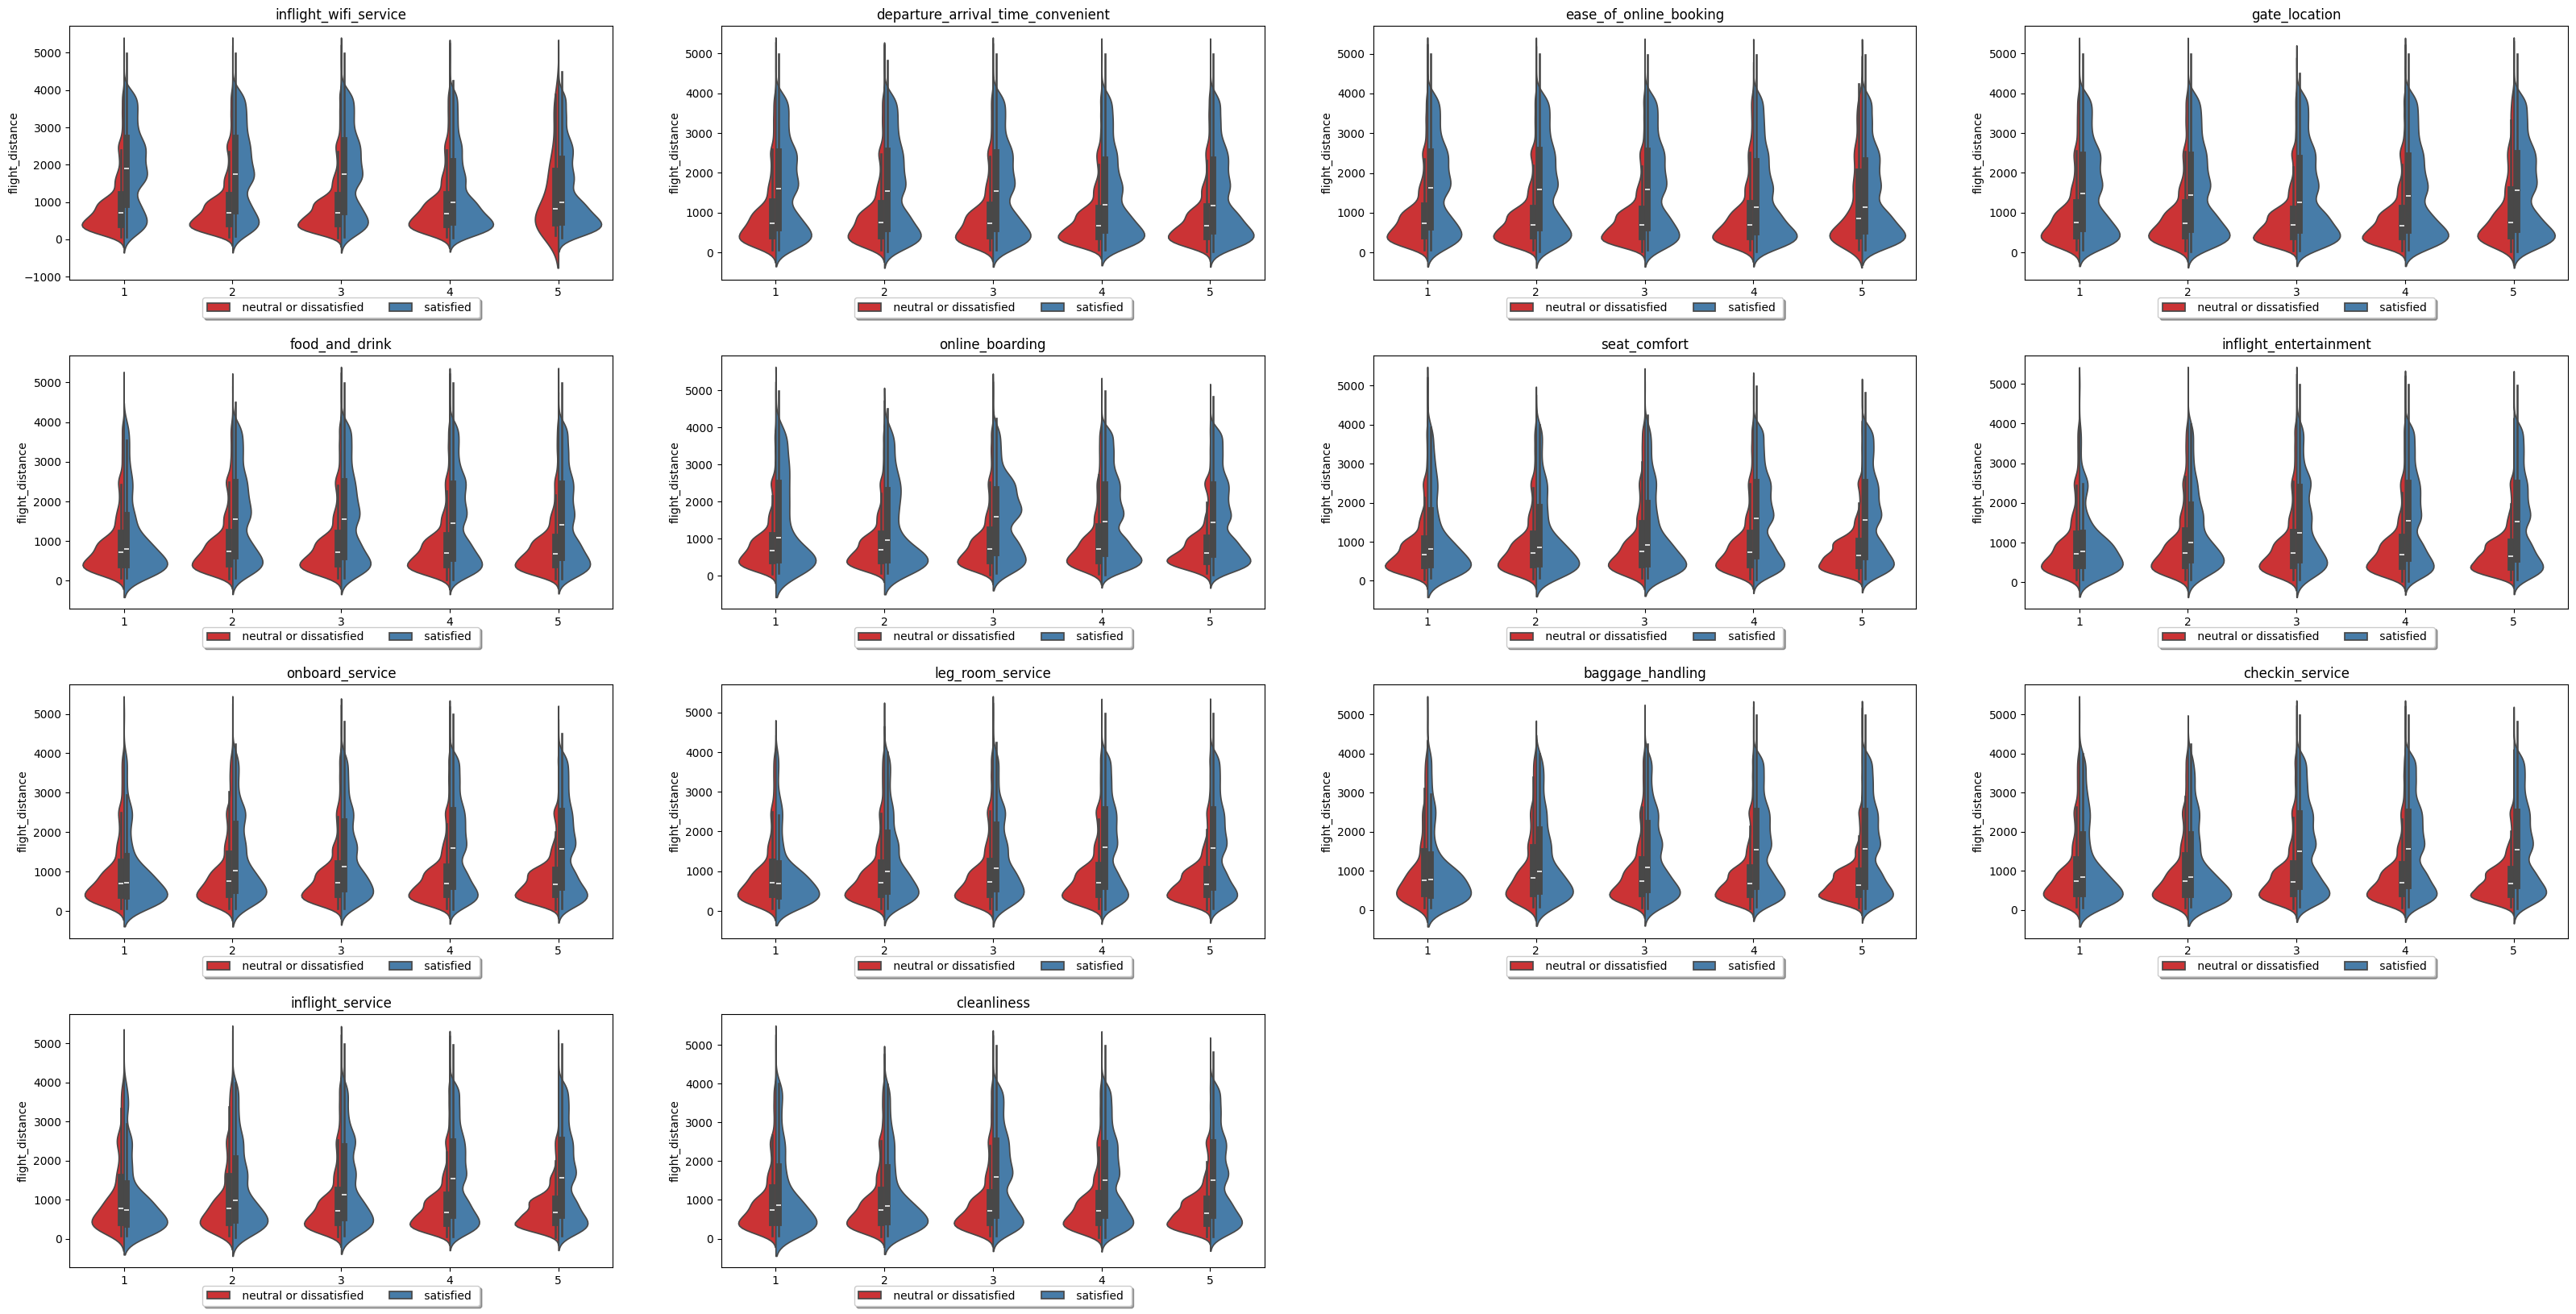

In [56]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data=df_cleaned,
                   x=score_col,
                   y='flight_distance',
                   hue="satisfaction",
                   split=True,
                   ax=ax,
                   palette='Set1')

    # Chart formatting
    ax.set_title(score_col)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

* There is a higher rate of satisfaction for customers who provided the highest mark for in-flight wi-fi service and online booking ease.

### Passenger cabin traveled affect rated aspects of airline service

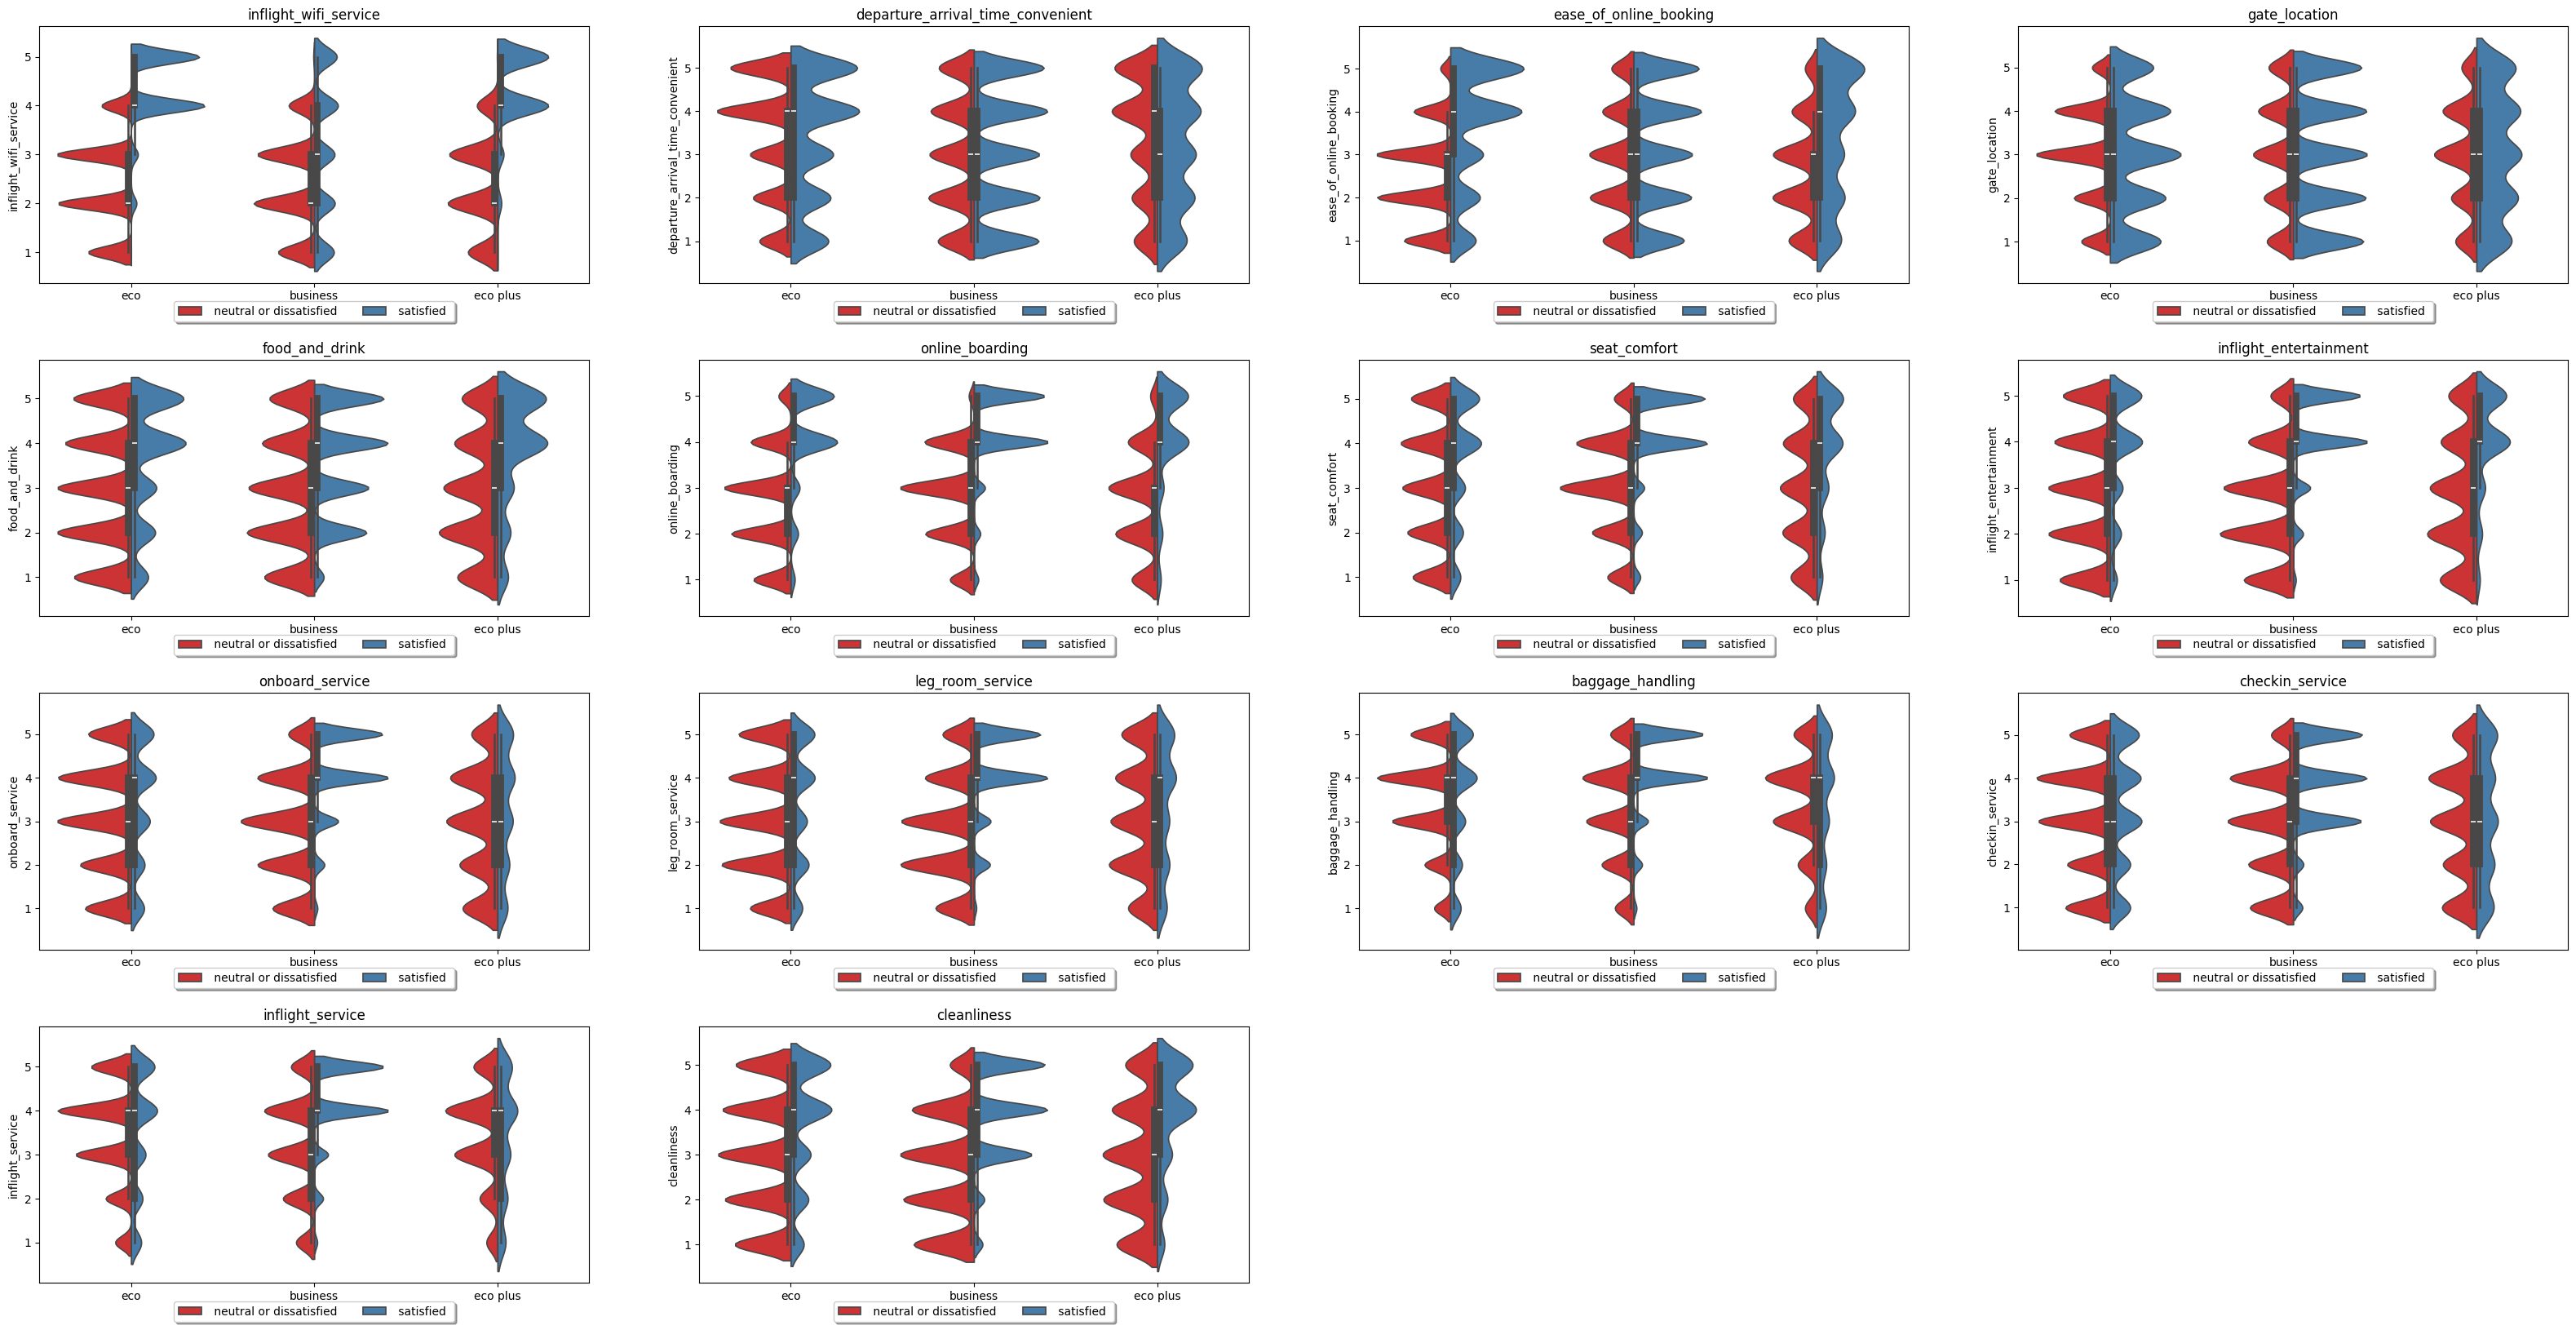

In [58]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data = df_cleaned, 
                   x = 'customer_class', 
                   y = score_col, 
                   hue = "satisfaction",
                   split = True,
                   ax = ax,
                   palette = 'Set1')

    # Chart formatting
    ax.set_title(score_col)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

* There are clear peaks in satisfaction and dissatisfaction for in-flight wi-fi service, online boarding, seat comfort, in-flight entertainment, on-board customer service, leg room, and in-inflight customer service.
* Online boarding and cabin cleanlilness appear to be an important factor in driving satisfaction regardless of cabin class in which the passenger is traveling.
* On-board service quality, leg room, baggage handling, check-in service, and inflight customer service appear to be important factors informing passenger satisfaction for business class passengers.

### The reason for travel affect airline service

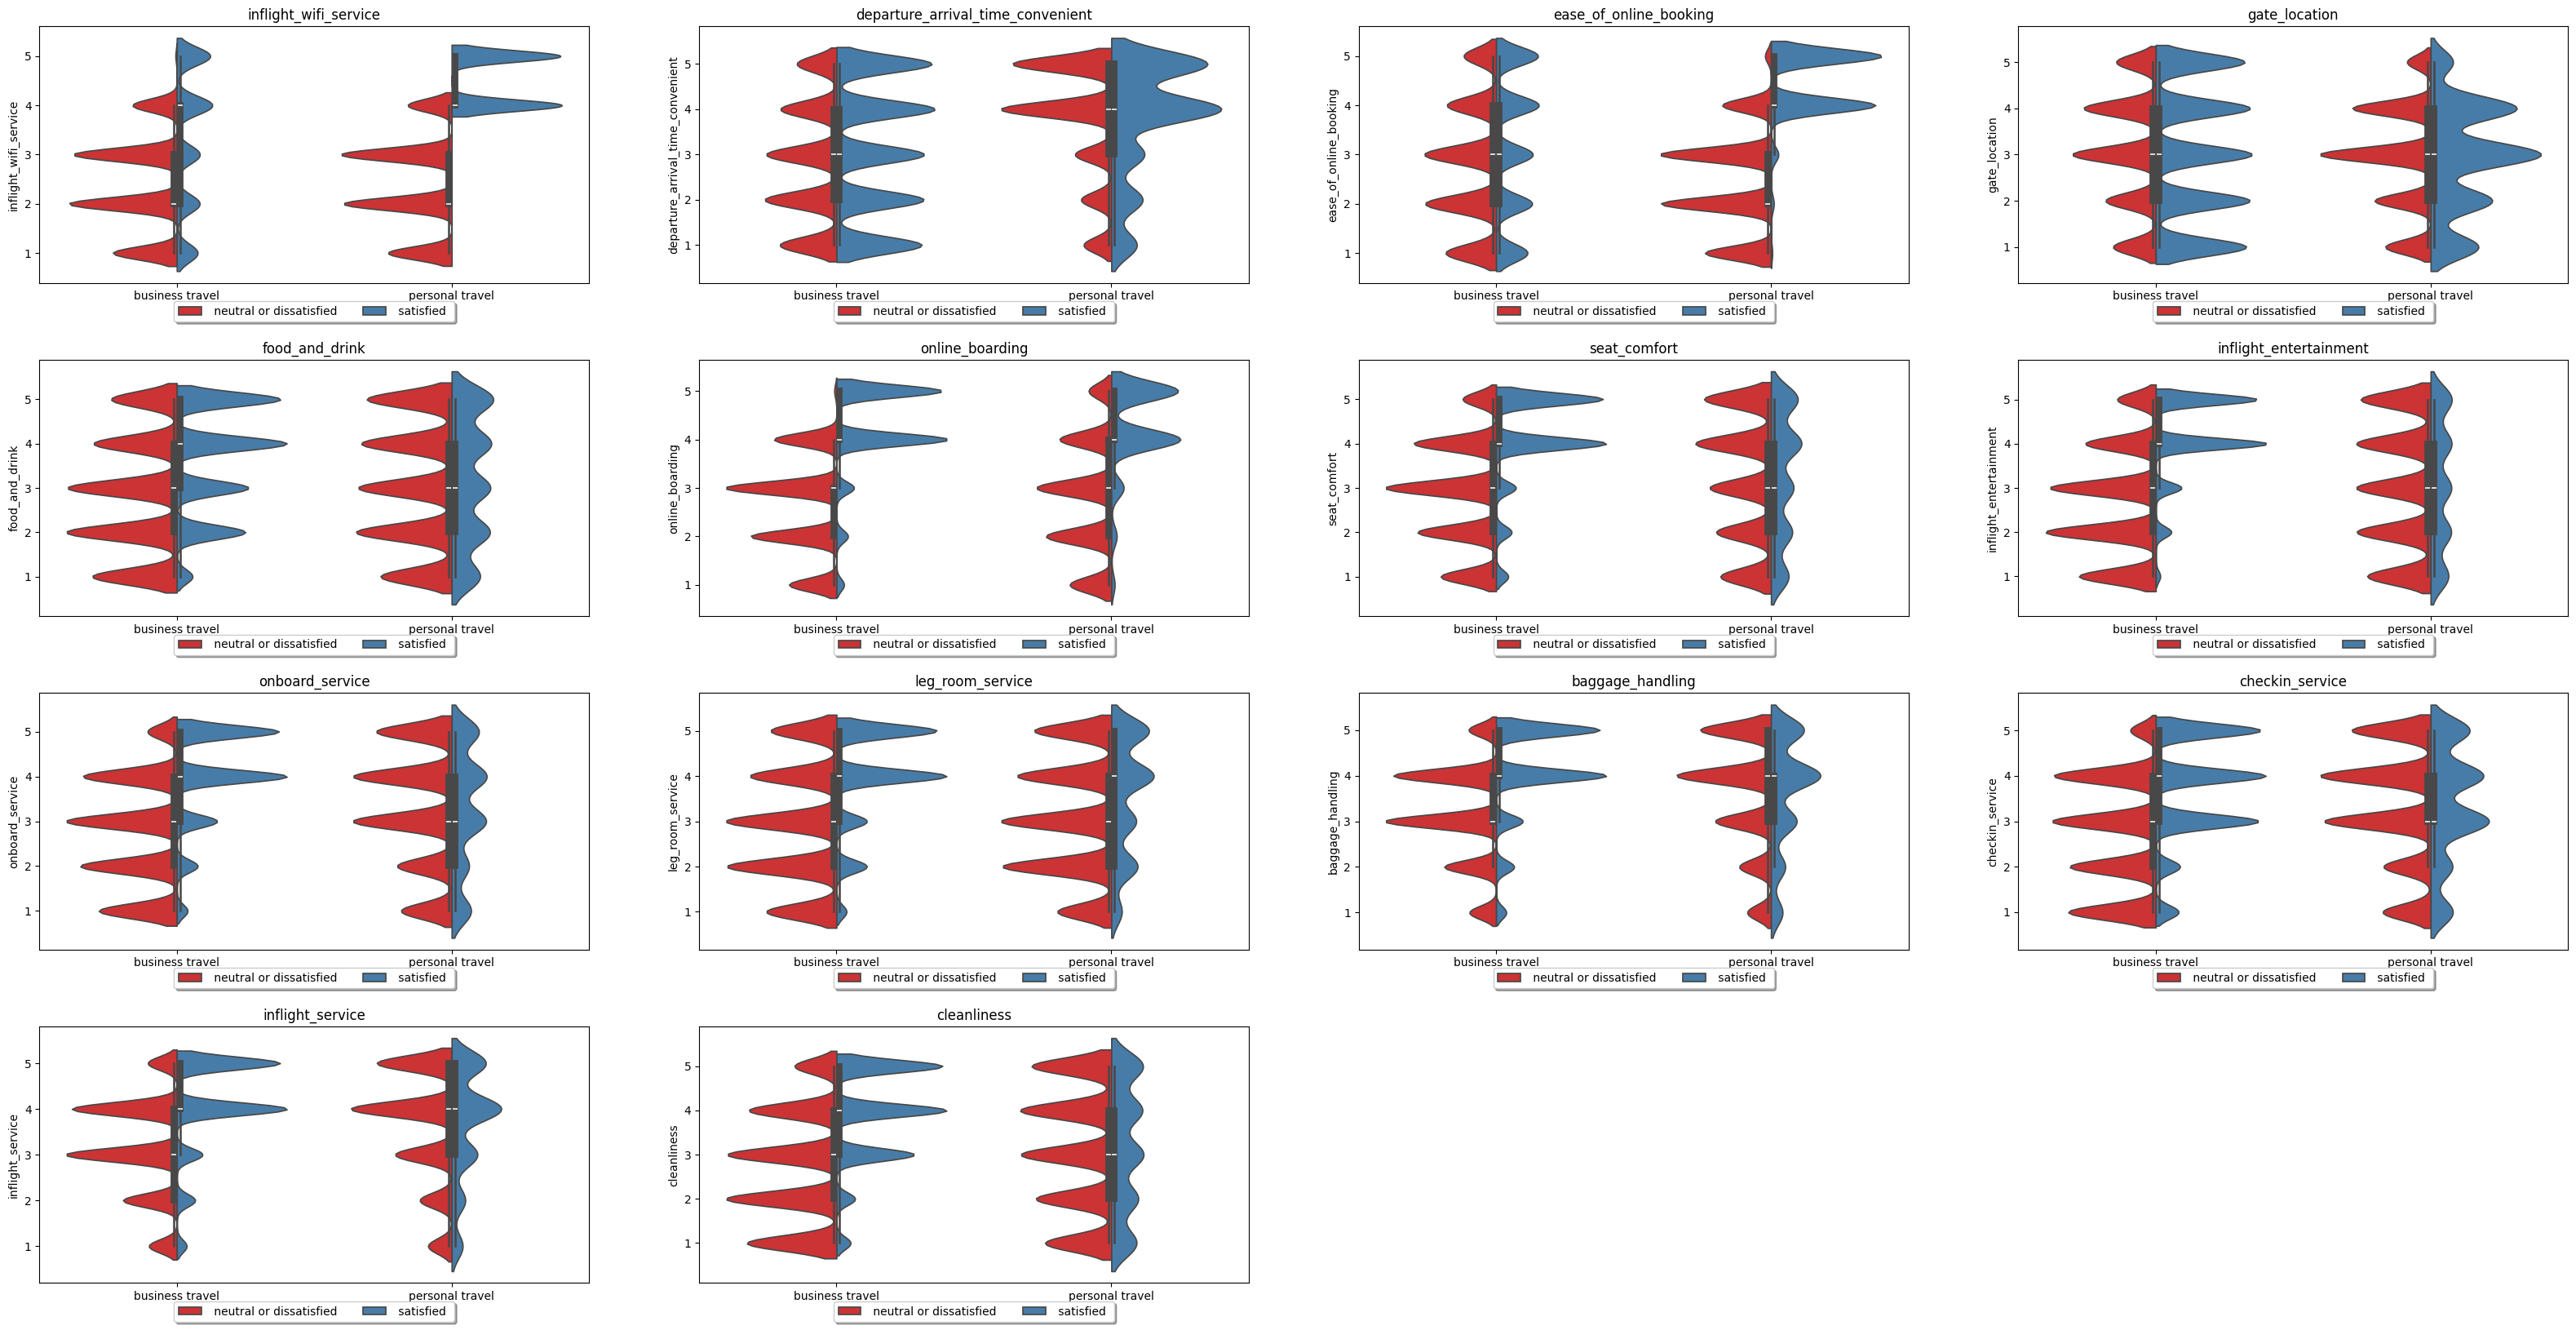

In [59]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data=df_cleaned,
                   x='type_of_travel',
                   y=score_col,
                   hue="satisfaction",
                   split=True,
                   ax=ax,
                   palette='Set1')

    # Chart formatting
    ax.set_title(score_col)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

* High ratings in boarding process have a high impact on satisfaction. 
* Inflight wi-fi service also has a good impact on customer satisfaction, 
* You can observe an almost inverse effect when considering the purpose of travel. 
* Low scores for in-flight wi-fi from business travelers impacts dissatisfaction.

# Data Split

In [68]:
# Randomly sample 80% of your dataframe
df_train = df_cleaned.sample(frac=0.9, random_state=42)

# Drop the training data to create a test set
df_test = df_cleaned.drop(df_train.index)

In [71]:
df_train.to_csv("data/train.csv", index=False)
df_test.to_csv("data/test.csv", index=False)